# This script is for the data story to be told to Bill 01/31

### The conclusion is that it is hard for us to generate a overall flat fee for eviction analysis
### Due to the amount of variability inside different categories of data

In [38]:
# first load in the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [39]:
# read in the data
df_ori = pd.read_csv('test.csv')
# group up the worked_hours, worked_dollars, billed hours and billed dollars
df = df_ori.groupby(['matter_id']).agg({'worked_hours': 'sum', 'worked_dollars': 'sum', 'billed_hours': 'sum', 'billed_dollars': 'sum'}).reset_index()
# attach the state back to the data
df = df.merge(df_ori[['matter_id', 'state']], on = 'matter_id', how = 'left')
df = df.drop_duplicates()


print(df.head())

      matter_id  worked_hours  worked_dollars  billed_hours  billed_dollars  \
0    00540-0467          6.25         3007.50          6.25          3007.5   
9    00540-0468          4.50         1687.50          4.50          1687.5   
20   07851-0008          5.00         1301.25          4.44          1156.0   
29   09273-0155        103.25        19962.50        103.25         19962.5   
145  09273-0157         23.00         5372.50         23.00          5372.5   

         state  
0    Louisiana  
9    Louisiana  
20     Florida  
29   Louisiana  
145  Louisiana  


In [40]:
# The number of unique matters we have in firm dataset is
print(df['matter_id'].nunique())

193


<Axes: xlabel='state'>

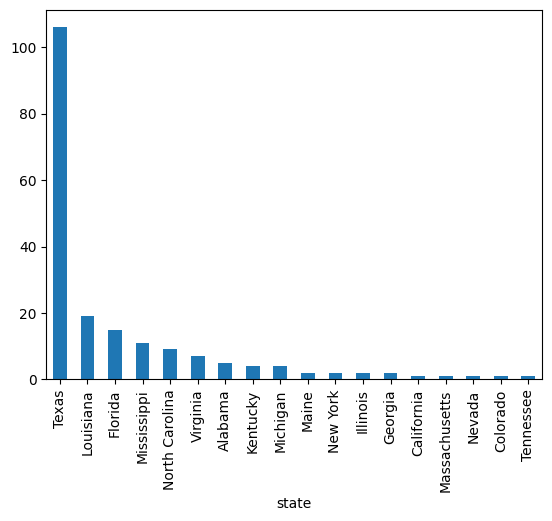

In [41]:
# The histogram of the number of matters per state is as follows
df_state_hist = df[['state', 'matter_id']].drop_duplicates()
df_state_hist['state'].value_counts().plot(kind='bar')

<Axes: >

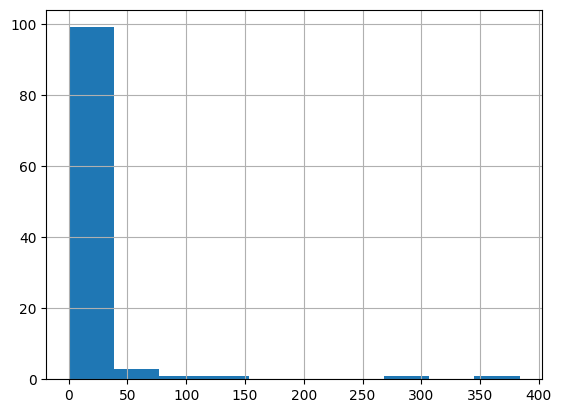

In [42]:
# The histogram of number of billed hours inside Texas is as follows
df_texas = df[df['state'] == 'Texas']
df_texas['billed_hours'].hist()
# set the limits of the x-axis to be 0 to 8

<Axes: >

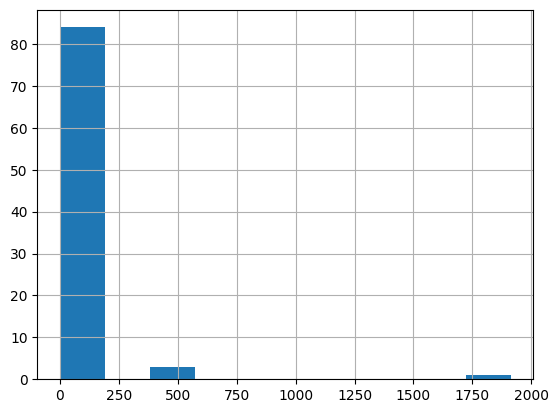

In [46]:
# the histograms for all the other states are as follows
df_other = df[df['state'] != 'Texas']
df_other['billed_hours'].hist()
# set the range of the histogram to be 0-8

<Figure size 2500x2000 with 0 Axes>

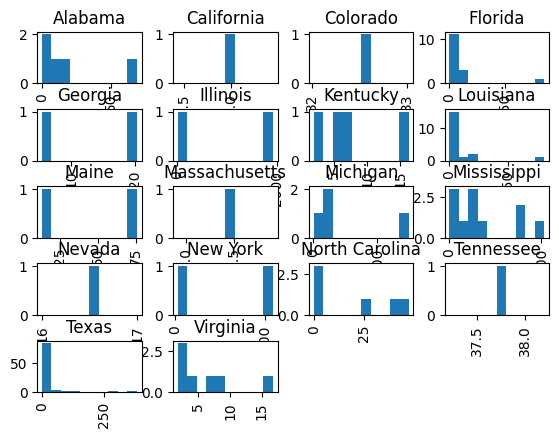

In [47]:
# The amount of billed hours for each state is as follows
df_state_billed = df[['state', 'billed_hours']].drop_duplicates()
# Setting the size of the entire figure
plt.figure(figsize=(25, 20))

# Creating histograms and setting y-axis range
axes = df_state_billed['billed_hours'].hist(by=df_state_billed['state'])

# Set the y-axis limit for each subplot

# Show the plot
plt.show()

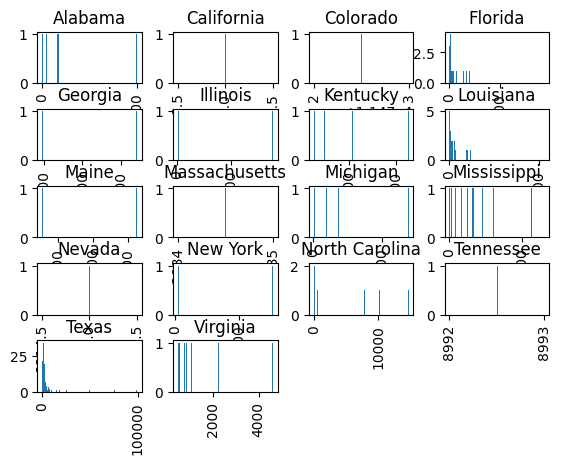

In [49]:
# the amount of billed dollars for each state is as follows
df_state_billed_dollars = df[['state', 'billed_dollars']].drop_duplicates()
# Creating histograms and setting y-axis range, each bin shall be 1000 dollars
axes = df_state_billed_dollars['billed_dollars'].hist(by=df_state_billed_dollars['state'], bins = 100)
    
# Show the plot
plt.show()